In [1]:
from singularite import eclatements, pairwise_coprime, isJStrict


def ok(n, xs):
    if all(x <= 1 for x in xs):
        return True
    return pairwise_coprime((n, *xs))

def to_tex(n, xs):
    return f'{{[{xs}]}}_{{{n}}}'

def to_s(n, xs):
    return f'{xs}_{n}'

def T(n, xs):
    children, bad = [], set()
    if ok(n, xs):
        for (ni, xi) in eclatements(n, xs):
            subt, subs = T(ni, xi)
            children.append(subt)
            bad |= subs
    else:
        bad |= {(n, xs)}
    return (LabelledOrderedTree(children, label=(n, xs)), bad)

def vis_eval(n, r):
    uncurry = lambda f: lambda p: f(*p)
    t, b = T(n, r)
    assert isJStrict(n, r) == (len(b) == 0)
    if len(b) == 0:
        view(t.map_labels(uncurry(to_tex)))
    else:
        y = [label for label in t.labels() if 1 in label[1] and label not in b]
        show(t.as_digraph().plot(
            vertex_color='green', 
            vertex_colors={'red': b, 'cyan': [(n, r)], 'yellow': y}, 
            layout='acyclic', 
            vertex_labels=uncurry(to_s)))



In [37]:
from itertools import combinations
from singularite import group, coprime


for n in range(20):
    for (b, a) in combinations(group(n), 2):
        if b > 1 and a + b < n and all( coprime(c, b) for c in range(n, 0, -a) ):
            print(n, a, b)


7 4 2
9 4 2
11 4 2
11 6 2
11 8 2
11 6 3
11 7 3
11 6 4
13 4 2
13 6 2
13 8 2
13 10 2
13 6 3
13 8 3
13 9 3
13 6 4
13 8 4
13 6 5
13 7 5
14 9 3
15 4 2
15 8 2
15 8 4
16 9 3
16 11 3
16 7 5
16 9 5
17 4 2
17 6 2
17 8 2
17 10 2
17 12 2
17 14 2
17 6 3
17 9 3
17 10 3
17 12 3
17 13 3
17 6 4
17 8 4
17 10 4
17 12 4
17 8 5
17 9 5
17 10 5
17 11 5
17 10 6
17 8 7
17 9 7
18 7 5
18 11 5
19 4 2
19 6 2
19 8 2
19 10 2
19 12 2
19 14 2
19 16 2
19 6 3
19 9 3
19 11 3
19 12 3
19 14 3
19 15 3
19 6 4
19 8 4
19 10 4
19 12 4
19 14 4
19 6 5
19 8 5
19 10 5
19 11 5
19 12 5
19 13 5
19 12 6
19 8 7
19 9 7
19 10 7
19 11 7
19 10 8


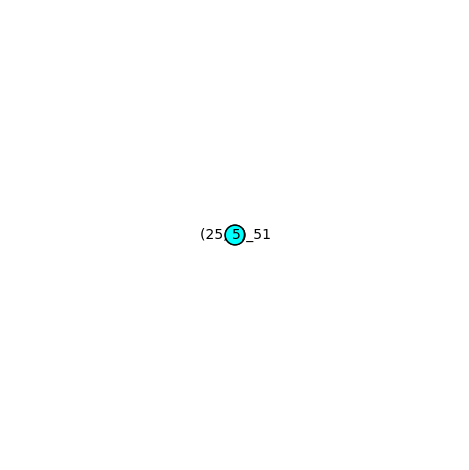

In [8]:
# n = 32, a = 13, b = 3, -a = 19
# vis_eval(32, (19, 3))
# vis_eval(11, (7, 2))
vis_eval(51, (25, 5))

23 6 5 False 17 5


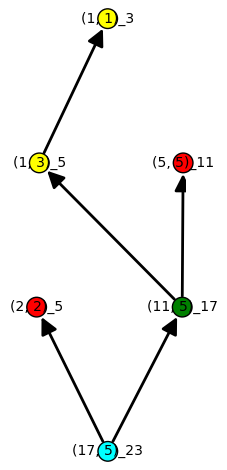

29 6 5 False 23 5


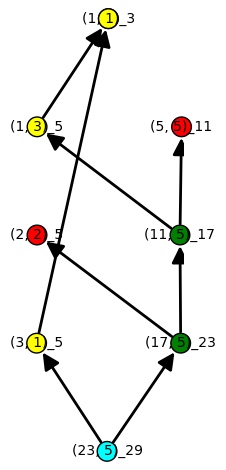

29 8 5 False 21 5


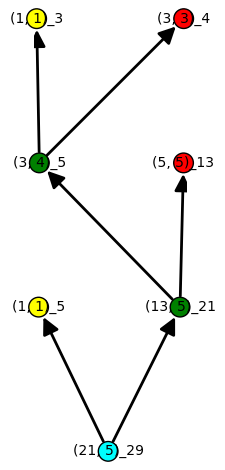

31 8 7 False 23 7


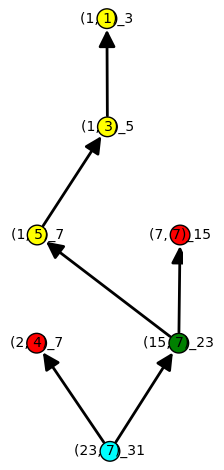

34 9 7 False 25 7


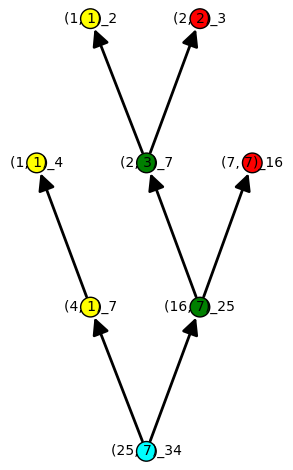

38 11 5 False 27 5


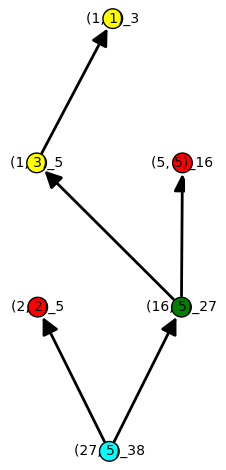

39 8 5 False 31 7


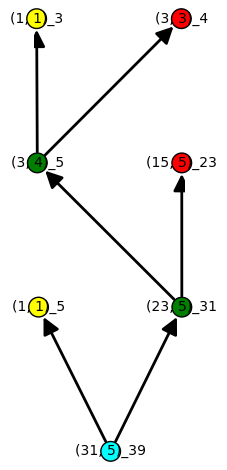

39 8 7 False 31 7


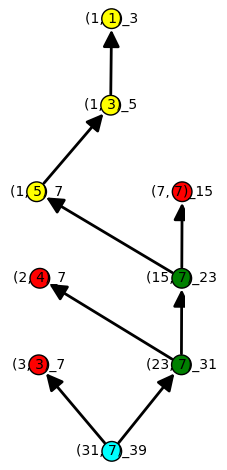

In [52]:
from singularite import isJStrict, group, coprime
from itertools import combinations

for n in range(40):
    for (b, a) in combinations(group(n), 2): # a > b
        d = n - a
        if b > 1 and a + b != n and isJStrict(n, (a, b)) and coprime(d, b):
            # if all( coprime(c, b) for c in range(d, 0, -a) ):
            #     print(n, a, b, d)
            #     vis_eval(n, (d, b))
            na = -n % d
            if coprime(na, b):
                print(n, a, b, isJStrict(n, (d, b)), d, d % a)
                vis_eval(n, (d, b))
                # vis_eval(n, (a, b))

6 (63, (23, 5)) (23, (17, 5)) False


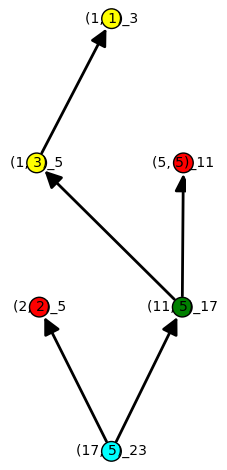

8 (79, (29, 5)) (29, (21, 5)) False


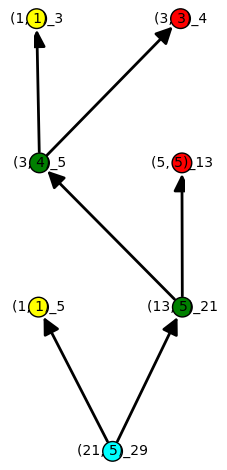

In [7]:
from itertools import combinations
from singularite import group, coprime, isJStrict

def descent(n: int, a: int, b: int):
    r = n
    while (r := r - a) >= b:
        yield r


# @interact
# def test(n = (2, 100)):
for n in range(2, 500):
    # %clear
    for (b, a) in combinations(set(group(n)) - {1}, 2):
        na = n % a
        d = a - na
        if coprime(b, na) and a >= na + b and isJStrict(n, (a, b)):
            # if isJStrict(a, (na, b)):
            if coprime(-a % na, b % na):
                print(d, (n, (a, b)), (a, (na, b)), isJStrict(a, (na, b)))
                vis_eval(a, (na, b))
            # assert not isJStrict(a, (na, b))



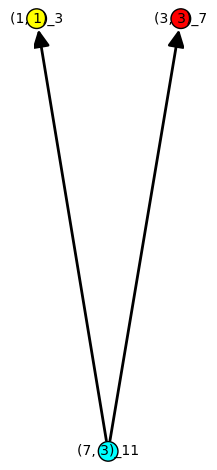

In [20]:
vis_eval(11, (7, 3))
# vis_eval(29, (11, 3))

In [17]:
from singularite import pairwise_coprime, group, isJStrict
from itertools import combinations

# 41, (2, 3, 7)
for n in range(2, 10):
    for (c, b, a) in combinations(group(n), 3):
        if c > 1 and pairwise_coprime([a,b,c]) and b + c <= a and a%b + c <= b:
            print(a, b, c, isJStrict(a, (b, c)), isJStrict(b, (a%b, c)))
        # if c > 1 and isJStrict(a, (b, c)) and isJStrict(b, (a%b, c)):
        #     assert n > c > b > a > 1
        #     print(a, b, c)


7 5 2 True False


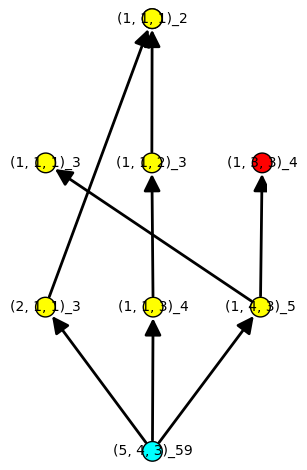

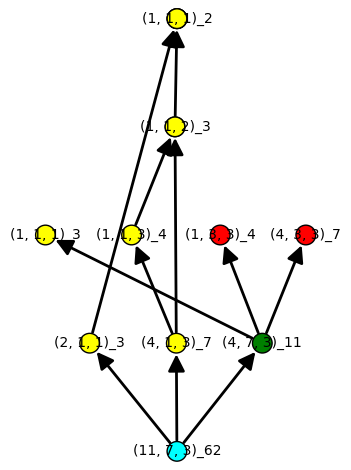

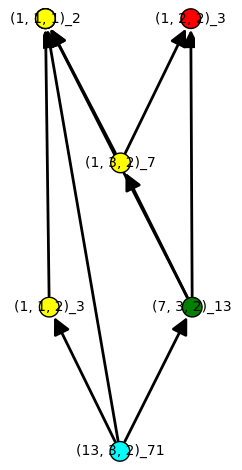

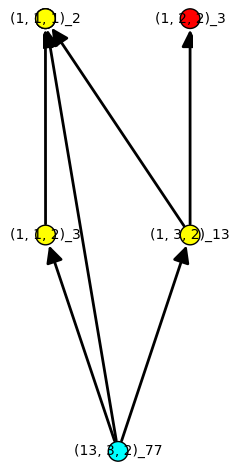

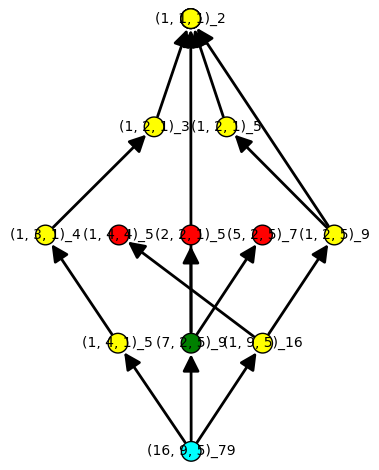

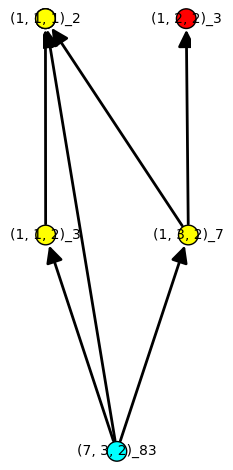

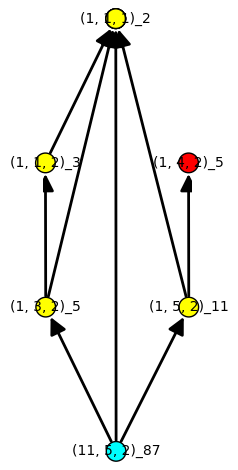

In [31]:
l = [
    (59, (5, 4, 3)),
    (62, (11, 7, 3)),
    (71, (13, 3, 2)),
    (77, (13, 3, 2)),
    (79, (16, 9, 5)),
    (83, (7, 3, 2)),
    (87, (11, 5, 2))
]

for (n, xs) in l:
    vis_eval(n, xs)

In [49]:
from singularite import coprime, pairwise_coprime, isJStrict
from itertools import combinations

g = lambda n: { x for x in range(2, n) if coprime(x, n) }
for n in range(2, 100):
    for (b, a) in combinations(g(n), 2):
        if isJStrict(n, (a, b)) and coprime(n - a, b):
            print((n, (a, b)), (n, (n - a, b)))

(11, (4, 3)) (11, (7, 3))
(17, (7, 3)) (17, (10, 3))
(17, (6, 5)) (17, (11, 5))
(19, (7, 5)) (19, (12, 5))
(20, (7, 3)) (20, (13, 3))
(23, (4, 3)) (23, (19, 3))
(23, (10, 3)) (23, (13, 3))
(23, (6, 5)) (23, (17, 5))
(23, (8, 7)) (23, (15, 7))
(27, (11, 5)) (27, (16, 5))
(27, (10, 7)) (27, (17, 7))
(29, (10, 3)) (29, (19, 3))
(29, (13, 3)) (29, (16, 3))
(29, (6, 5)) (29, (23, 5))
(29, (8, 5)) (29, (21, 5))
(29, (12, 5)) (29, (17, 5))
(29, (10, 9)) (29, (19, 9))
(31, (8, 7)) (31, (23, 7))
(31, (11, 9)) (31, (20, 9))
(32, (13, 3)) (32, (19, 3))
(32, (11, 5)) (32, (21, 5))
(34, (7, 5)) (34, (27, 5))
(34, (9, 7)) (34, (25, 7))
(35, (4, 3)) (35, (31, 3))
(35, (16, 3)) (35, (19, 3))
(35, (13, 9)) (35, (22, 9))
(35, (12, 11)) (35, (23, 11))
(37, (16, 5)) (37, (21, 5))
(37, (15, 7)) (37, (22, 7))
(38, (7, 3)) (38, (31, 3))
(38, (13, 3)) (38, (25, 3))
(38, (11, 5)) (38, (27, 5))
(39, (8, 5)) (39, (31, 5))
(39, (17, 5)) (39, (22, 5))
(39, (8, 7)) (39, (31, 7))
(41, (7, 3)) (41, (34, 3))
(41, (19,

In [42]:
from itertools import permutations

# a = 13
# for b in g(a):
#     for k in range(1, 40):
#         n = a+b+k*a*b
#         c = crt([1, 1], [a, b]) + a*b
#         if -n%c == 1:
#             print(n, a, b,c , isJStrict(n, (a, b)), isJStrict(n, (a, b, c)))
#             vis_eval(n, (a, b, c))
def cond(n, a, b, c):
    if not all(isJStrict(x, (y, z)) for (x, y, z) in permutations((n, a, b, c), int(3))):
        return False
    return True

for n in range(7):
    for (a, b, c) in combinations(g(n), 3):
        for (x, y, z) in permutations((n, a, b, c), int(3)):
            print(x, y, z)
#         if cond(n, a, b, c):
#             print(n, a, b, c)
#             vis_eval(n, (a, b, c))

5 2 3
5 2 4
5 3 2
5 3 4
5 4 2
5 4 3
2 5 3
2 5 4
2 3 5
2 3 4
2 4 5
2 4 3
3 5 2
3 5 4
3 2 5
3 2 4
3 4 5
3 4 2
4 5 2
4 5 3
4 2 5
4 2 3
4 3 5
4 3 2
